# Hierarchical/Agglomerative Clusting

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score, davies_bouldin_score

import random
import numpy as np

SEED = 42


In [30]:
merged_df = pd.read_csv('merged_df.csv')

# drop all nan or missing values
df = merged_df.dropna().copy()
print(df['time_window'].unique())
print("\n", len(df))

['12AM–3AM' '3AM–6AM' '6AM–9AM' '9PM–12AM' '6PM–9PM' '9AM–12PM' '3PM–6PM'
 '12PM–3PM']

 34759


In [63]:
# features that will be used in clustering
features = ['time_window', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 
            'acousticness','instrumentalness', 'valence', 'tempo']

# encode categorical values for every 3 hours in time_window
time_order = ['12AM–3AM', '3AM–6AM', '6AM–9AM', '9AM–12PM', '12PM–3PM', '3PM–6PM','6PM–9PM', '9PM–12AM']
cat = pd.Categorical(df['time_window'], categories=time_order, ordered=True)

# Encode to number
df['times_encoded'] = cat.codes
print(df[['time_window', 'times_encoded']].value_counts())

# get random sample of dataset to reduce number of records for hierarchical/agglomerative clustering
random_df = df.sample(n=3000, random_state=SEED)
print(len(random_df))

time_window  times_encoded
12AM–3AM     0                7127
9PM–12AM     7                6419
6PM–9PM      6                6153
3AM–6AM      1                5418
3PM–6PM      5                4267
6AM–9AM      2                3363
12PM–3PM     4                1179
9AM–12PM     3                 833
Name: count, dtype: int64
3000


In [64]:
# features that will be used in clustering
#print(df.dtypes)
X = random_df[['times_encoded', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'valence', 'tempo']]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3 clusters: {0: 2995, 2: 4, 1: 1}
4 clusters: {0: 2984, 1: 11, 2: 4, 3: 1}
8 clusters: {0: 2974, 2: 10, 1: 6, 3: 4, 6: 3, 7: 1, 5: 1, 4: 1}

2 clusters -> Silhouette: 0.589, DB: 0.298
3 clusters -> Silhouette: 0.495, DB: 0.439
4 clusters -> Silhouette: 0.501, DB: 0.458



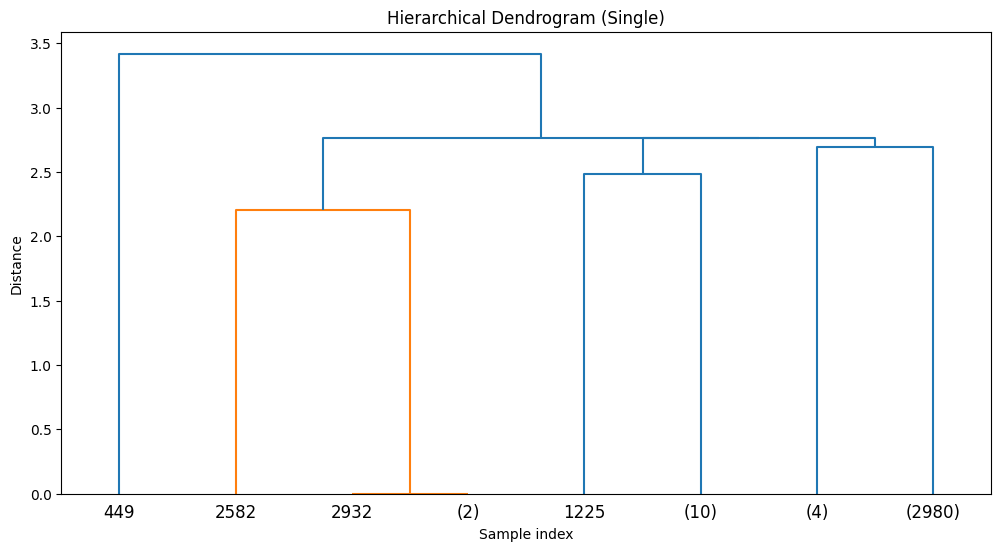

In [99]:
# Single linkage
for k in [3,4,8]:
    h_cluster = AgglomerativeClustering(n_clusters=k, linkage='single')
    labels = h_cluster.fit_predict(X_scaled)
    print(f"{k} clusters:", pd.Series(labels).value_counts().to_dict())

print()

for k in [2,3,4]:
    agglo = AgglomerativeClustering(n_clusters=k, linkage='single')
    labels = agglo.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    print(f"{k} clusters -> Silhouette: {sil:.3f}, DB: {db:.3f}")
    
print()

# dendrogram
linked = linkage(X_scaled, method='single')

plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode='level', p=3)
plt.title("Hierarchical Dendrogram (Single)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

3 clusters: {1: 2484, 2: 427, 0: 89}
4 clusters: {0: 2484, 2: 427, 1: 73, 3: 16}
8 clusters: {1: 1077, 2: 1077, 0: 427, 7: 255, 5: 75, 4: 38, 6: 35, 3: 16}

2 clusters -> Silhouette: 0.425, DB: 1.094
3 clusters -> Silhouette: 0.298, DB: 1.167
4 clusters -> Silhouette: 0.290, DB: 1.267



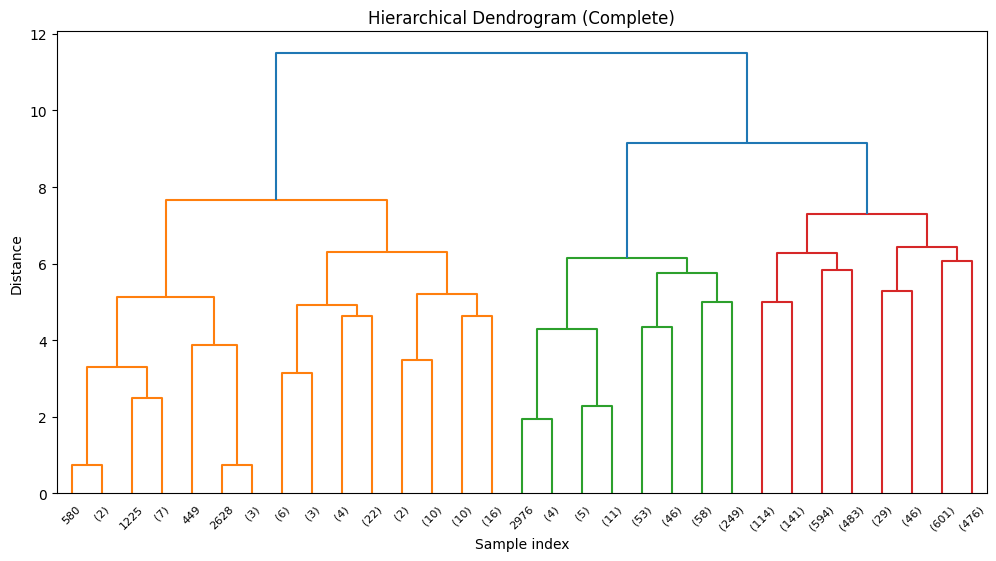

In [93]:
# Complete linkage
for k in [3,4,8]:
    h_cluster = AgglomerativeClustering(n_clusters=k, linkage='complete')
    labels = h_cluster.fit_predict(X_scaled)
    print(f"{k} clusters:", pd.Series(labels).value_counts().to_dict())

print()

for k in [2,3,4]:
    agglo = AgglomerativeClustering(n_clusters=k, linkage='complete')
    labels = agglo.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    print(f"{k} clusters -> Silhouette: {sil:.3f}, DB: {db:.3f}")
    
print()

# dendrogram
linked = linkage(X_scaled, method='complete')

plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode='level', p=4)
plt.title("Hierarchical Dendrogram (Complete)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

In [94]:
# Ward linkage
for k in [3,4,8]:
    h_cluster = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = h_cluster.fit_predict(X_scaled)
    print(f"{k} clusters:", pd.Series(labels).value_counts().to_dict())
    
print()

for k in [2,3,4]:
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agglo.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    print(f"{k} clusters -> Silhouette: {sil:.3f}, DB: {db:.3f}")

3 clusters: {0: 2039, 1: 803, 2: 158}
4 clusters: {1: 1096, 3: 943, 0: 803, 2: 158}
8 clusters: {0: 863, 1: 562, 6: 381, 3: 368, 4: 246, 5: 233, 7: 189, 2: 158}

2 clusters -> Silhouette: 0.234, DB: 1.589
3 clusters -> Silhouette: 0.247, DB: 1.469
4 clusters -> Silhouette: 0.158, DB: 1.738


The silhouette scores close to 0 show there may be some overlap in the clustering. A lower Davies Bouldin is better so 3 clusters seems to be the best parameter for this dataset for all linkage types. Complete linkage seems to perform a little better than ward while single has better scores. Single however leads to chaining so I don't think we should use that.

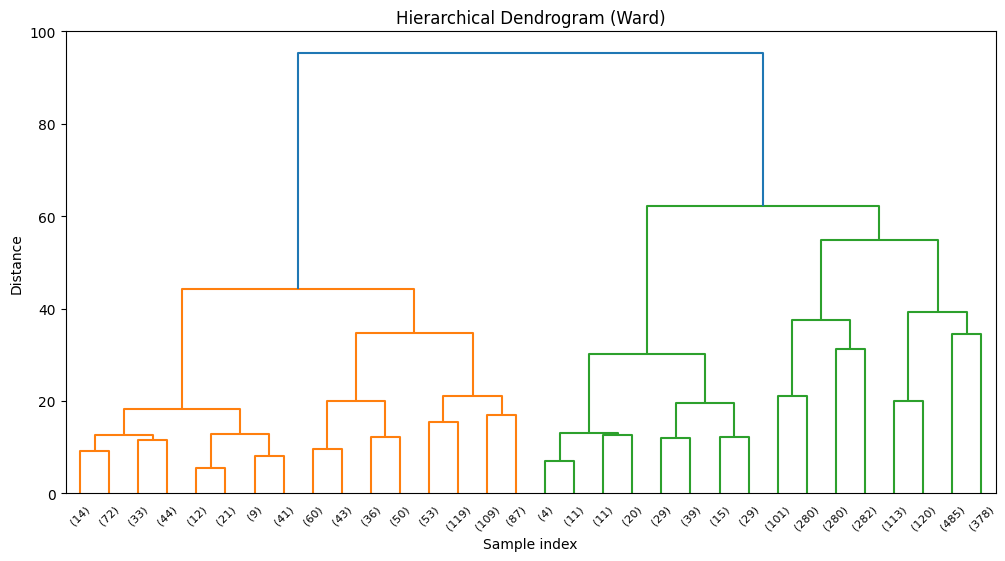

In [67]:
# dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode='level', p=4)
plt.title("Hierarchical Dendrogram (Ward)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


Looks like we have 3 good clusters maybe 4 in this sample of 3000 rows in the data. Changing the 3000 randomly picked samples fluctuates between 3 and 4, so need to look at other metrics as well.

In [102]:
complete_cluster = AgglomerativeClustering(n_clusters=3, linkage='complete')
complete_labels = complete_cluster.fit_predict(X_scaled)

random_df['cluster_label_complete'] = complete_labels
print(random_df['cluster_label_complete'].value_counts())

print()

ward_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
ward_labels = ward_cluster.fit_predict(X_scaled)

random_df['cluster_label_ward'] = ward_labels
print(random_df['cluster_label_ward'].value_counts())

cluster_label_complete
1    2484
2     427
0      89
Name: count, dtype: int64

cluster_label_ward
0    2039
1     803
2     158
Name: count, dtype: int64


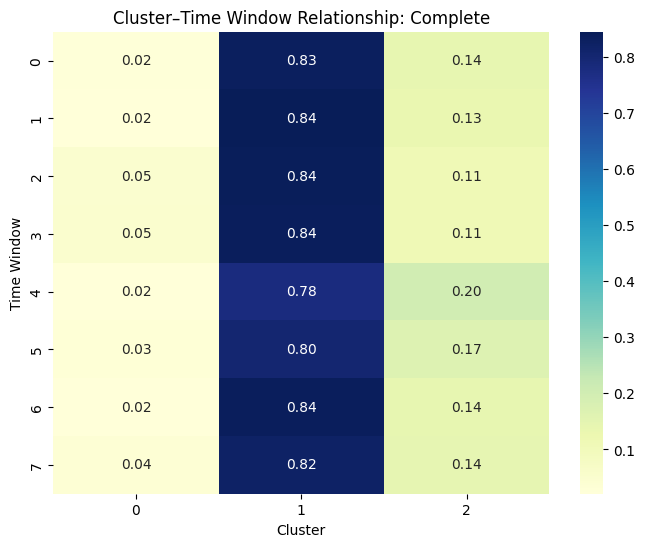

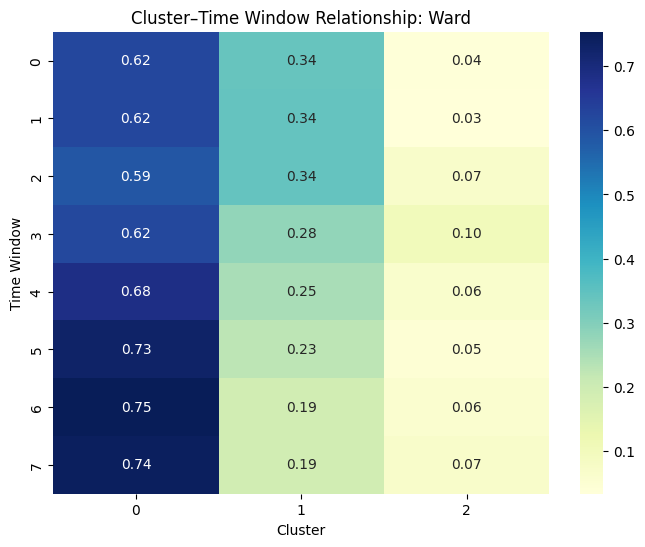

In [103]:
# time windows and cluster relationships: 0 = 12AM-3AM and so on
# complete
heat = pd.crosstab(random_df['times_encoded'], random_df['cluster_label_complete'], normalize='index')

plt.figure(figsize=(8,6))
sns.heatmap(heat, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Cluster–Time Window Relationship: Complete')
plt.xlabel('Cluster')
plt.ylabel('Time Window')
plt.show()


# ward
heat = pd.crosstab(random_df['times_encoded'], random_df['cluster_label_ward'], normalize='index')

plt.figure(figsize=(8,6))
sns.heatmap(heat, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Cluster–Time Window Relationship: Ward')
plt.xlabel('Cluster')
plt.ylabel('Time Window')
plt.show()


### Complete obviously doesn't give us much to go off of so the rest of the analysis will be done with the ward linkage method.

Only 3000 samples taken from the data: Heatmap shows that using the given features (energy, loudness, speechiness, acousticness, valence, and tempo) do have some mild patterns accross times. 

- Cluster 0 contains songs that are more common after 12PM but some overlap occurs in the morning as well. I think it is safe to say more music is listened to overall as the day goes on.

- Cluster 1 songs are more common in the ealry morning and decrease over the course of a day. 

- Cluster 2 is minimal and probably is tracking outliers.

From here we don't know which song attributes are causing these differences.

### Can we see which attributes are causing the largest effect?

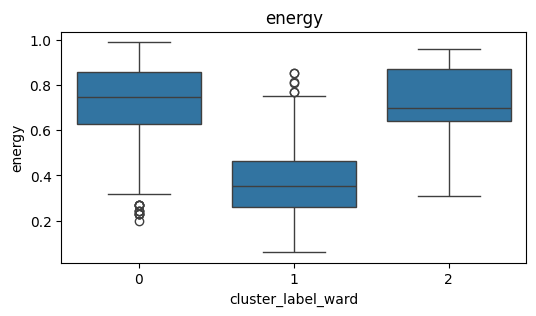

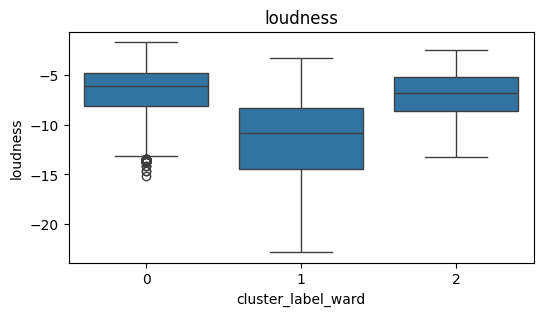

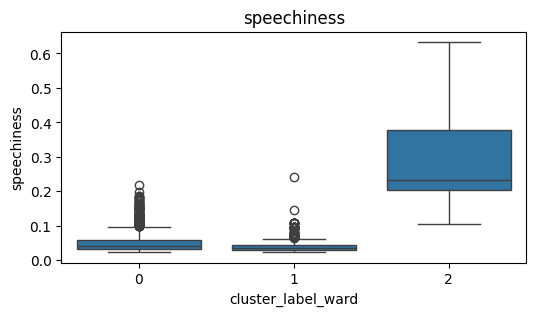

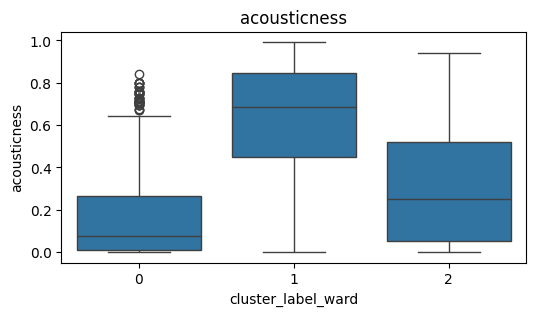

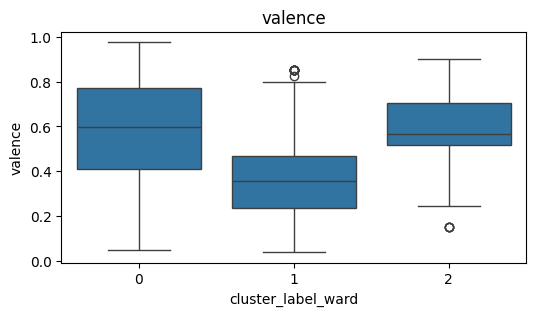

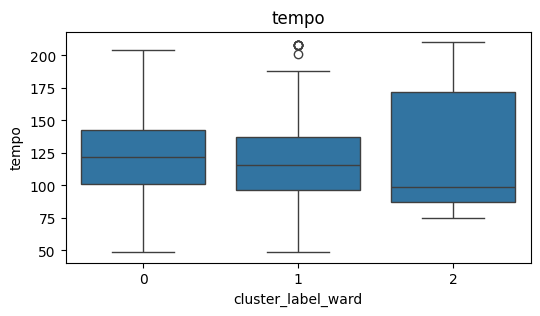

In [104]:
song_attributes = ['energy','loudness','speechiness','acousticness','valence','tempo']

# get means and medians aggregated by cluster labels
cluster_means = random_df.groupby('cluster_label_ward')[song_attributes].mean()
cluster_medians = random_df.groupby('cluster_label_ward')[song_attributes].median()
# print("Means:\n", cluster_means)
# print("Medians:\n", cluster_medians)

# Heatmap of mean feature values per cluster
# plt.figure(figsize=(8,4))
# sns.heatmap(cluster_means.T, annot=True, fmt=".2f", cmap='vlag')
# plt.title("Cluster feature means")
# plt.xlabel("Cluster")
# plt.ylabel("Feature")
# plt.show()

# boxplots for each feature comparing clusters
cols = ['energy','loudness','speechiness','acousticness','valence','tempo']
for col in cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='cluster_label_ward', y=col, data=random_df)
    plt.title(col)
    plt.show()

The above box plots show the mean distributions of the song attributes in each cluster. Tempo seems to stay about the same throughout the day in all clusters. Valence, energy, and loudness are lower in cluster 1 than cluster 0 which makes sense for earlier morning playback. An interesting note is the speechiness of songs in cluster 2 is much higher. May need to look into this more.

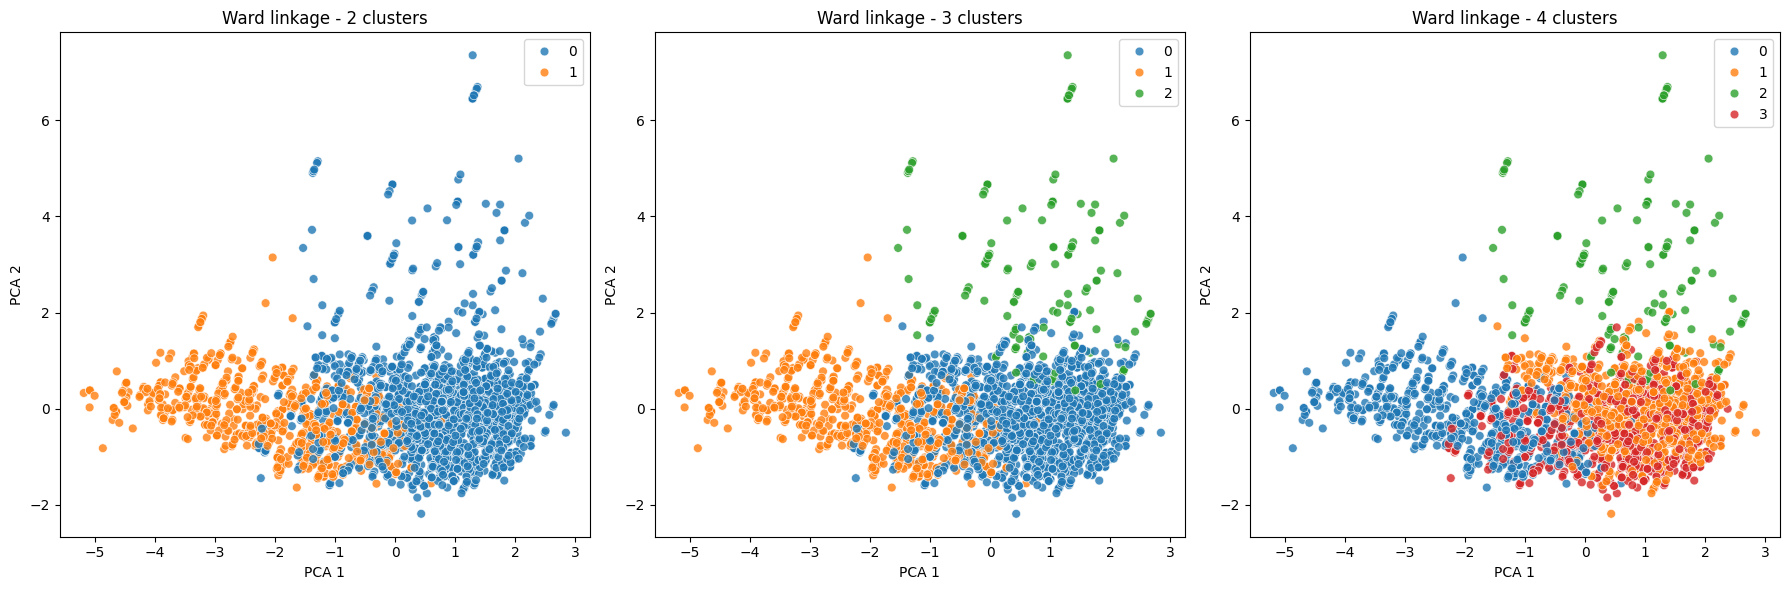

In [105]:
# PCA
pca_df = df.sample(n=3000, random_state=SEED)
pca_X = pca_df[['times_encoded', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'valence', 'tempo']]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 3, figsize=(18,6))

for ax, k in zip(axes, [2, 3, 4]):
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agglo.fit_predict(X_scaled)
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels,
                    palette='tab10', s=40, alpha=0.8, ax=ax)
    ax.set_title(f'Ward linkage - {k} clusters')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')

plt.tight_layout()
plt.show()


We do see some separation from PCA but quite a bit of overlap which was expected with the silhouette scores closer to 0 than 1. Either 3 or 4 does the best clustering. I'm wondering if DBSCAN would show something interesting here?

,PC1,PC2,PC3
times_encoded,-0.032484,-0.094285,0.945632
energy,0.593240,0.024317,0.007416
loudness,0.543629,-0.141283,-0.035797
speechiness,0.117264,0.772276,0.133101
acousticness,-0.511242,0.231543,0.052282
valence,0.248188,0.489950,0.095269
tempo,0.121495,-0.283699,0.273711


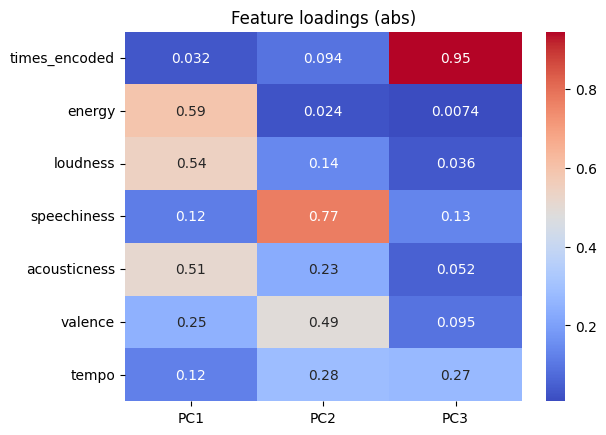

In [106]:
loadings = pd.DataFrame(pca.components_.T,
                        index=['times_encoded','energy','loudness','speechiness','acousticness','valence','tempo'],
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)])
display(loadings)

# heatmap: used absolute values to better compare the components having the largest effects
sns.heatmap(loadings.abs(), annot=True, cmap='coolwarm')
plt.title('Feature loadings (abs)'); plt.show()

PC1 is most affected by the energy, loudness, and acousticness of the songs. Given what we know about these 3 attributes, I think it's safe to say this principle component is most affected by the song tone/energy. 

PC2 is most affected by the speechiness and valence. 

PC3 is interesting because this is the only component that is largely affected by the time windows and minimally influenced by tempo. This indicates that the songs in this cluster are not really distinguishable and may include more outliers than anything else. Our times are not really affecting the outcomes of our other PC's and time windows may not be a good clustering addition overall.

## Extra scatter plots of each attribute over time

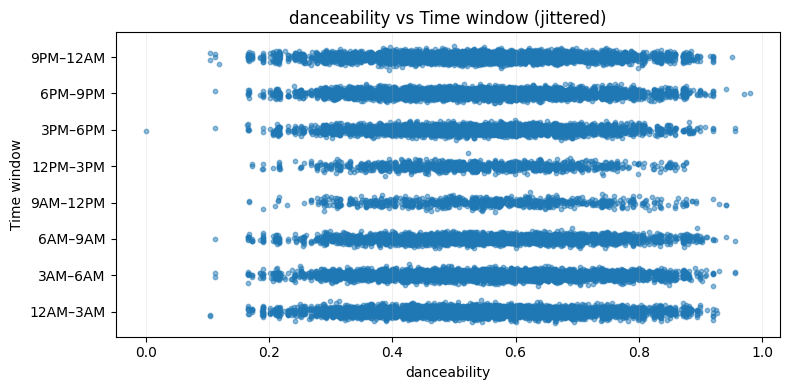

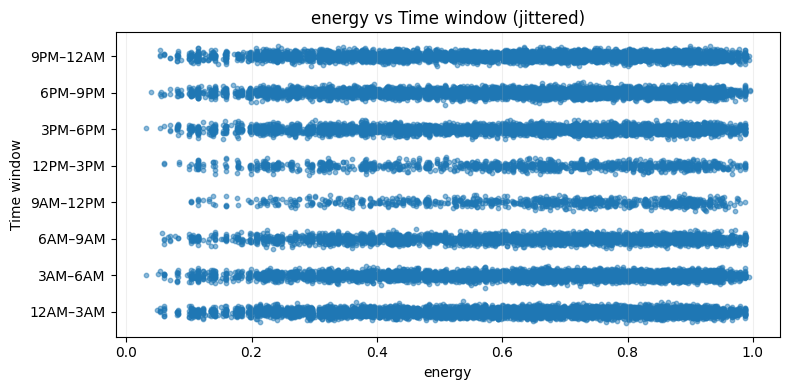

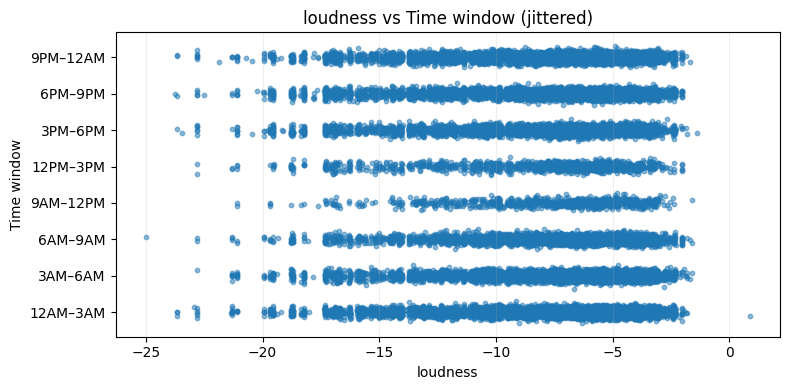

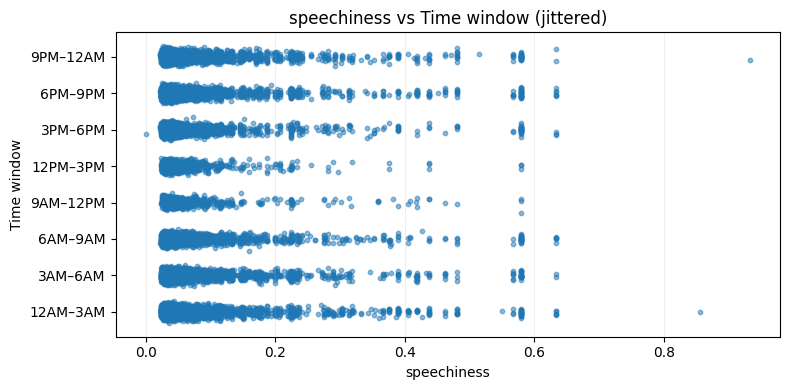

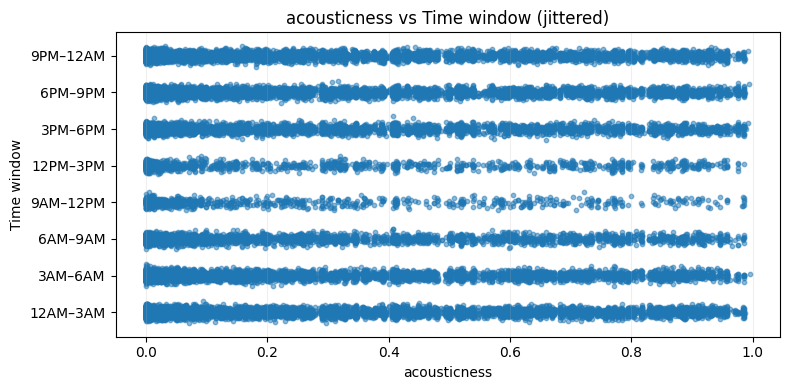

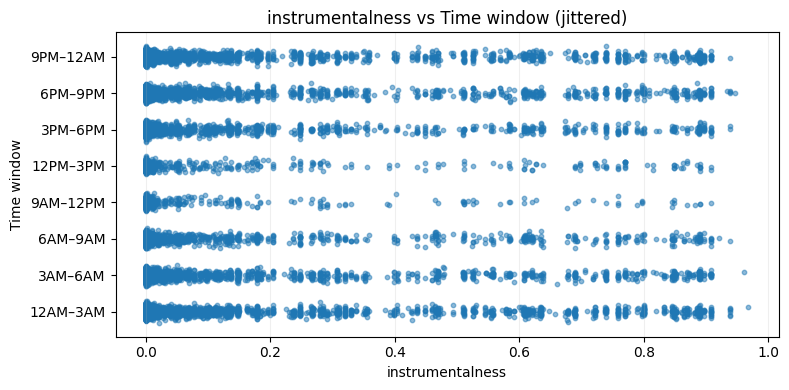

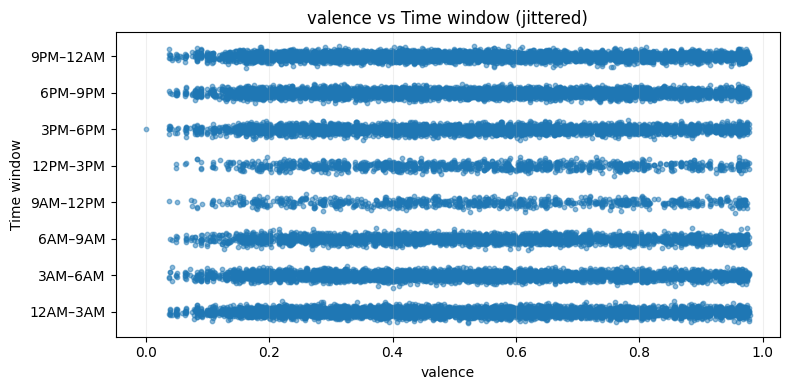

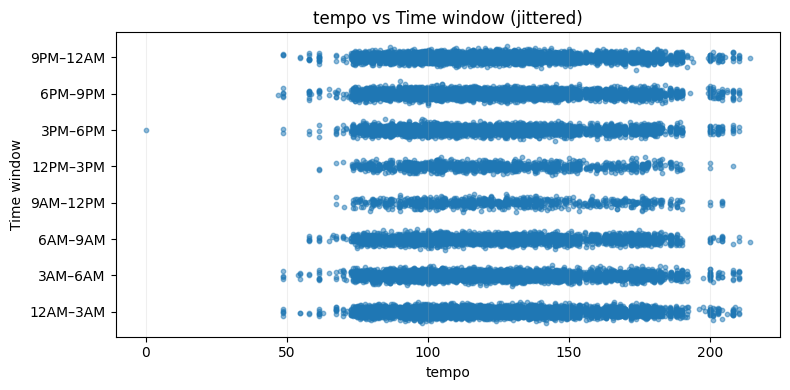

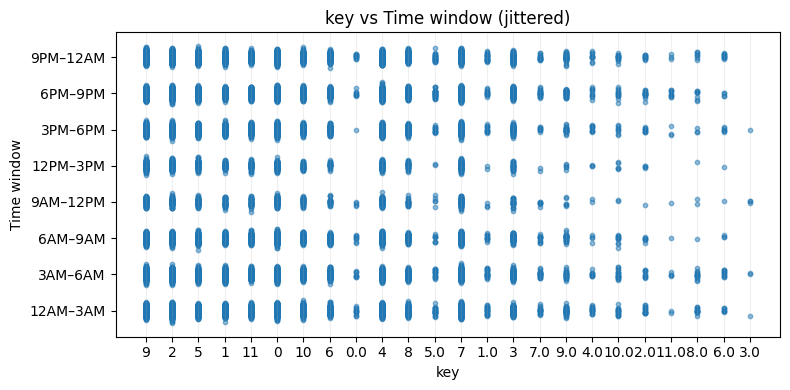

In [78]:
# scatter plots
# ...existing code...
# scatter: x = attribute, y = times_encoded (one figure per attribute)
attrs = ['danceability','energy','loudness','speechiness',
         'acousticness','instrumentalness','valence','tempo','key']

time_order = ['12AM–3AM','3AM–6AM','6AM–9AM','9AM–12PM',
              '12PM–3PM','3PM–6PM','6PM–9PM','9PM–12AM']

# ensure times_encoded exists
if 'times_encoded' not in df.columns:
    cat = pd.Categorical(df['time_window'], categories=time_order, ordered=True)
    df['times_encoded'] = cat.codes

rng = np.random.RandomState(SEED)

for attr in attrs:
    plot_df = df.dropna(subset=[attr, 'time_window']).copy()
    if plot_df.empty:
        print(f"no data for {attr}, skipping")
        continue

    y_jitter = plot_df['times_encoded'].values + rng.normal(loc=0, scale=0.08, size=len(plot_df))
    x_vals = plot_df[attr].values

    plt.figure(figsize=(8,4))
    plt.scatter(x_vals, y_jitter, s=10, alpha=0.5, color='tab:blue')
    plt.yticks(ticks=range(len(time_order)), labels=time_order)
    plt.xlabel(attr)
    plt.ylabel('Time window')
    plt.title(f'{attr} vs Time window (jittered)')
    plt.grid(axis='x', alpha=0.2)
    plt.tight_layout()
    plt.show()
# ...existing code...